In this study, I work with <b>Pima Indians Diabetes Database</b>, available on Kaggle, issuing different Machine Learning Algorithms and stressing which one has the best performance to predict diabetes onset based on some parameters: n° of pregnancies, glucose serum levels, blood pressure, skin thickness, insulin level, body mass index, "diabetes pedigree function" that accounts for diabetes past history and finally, age.

In [1]:
# We start every DS project importing most used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
# Then, we must load the dataset and get information about it
dados = pd.read_csv('diabetes.csv')
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


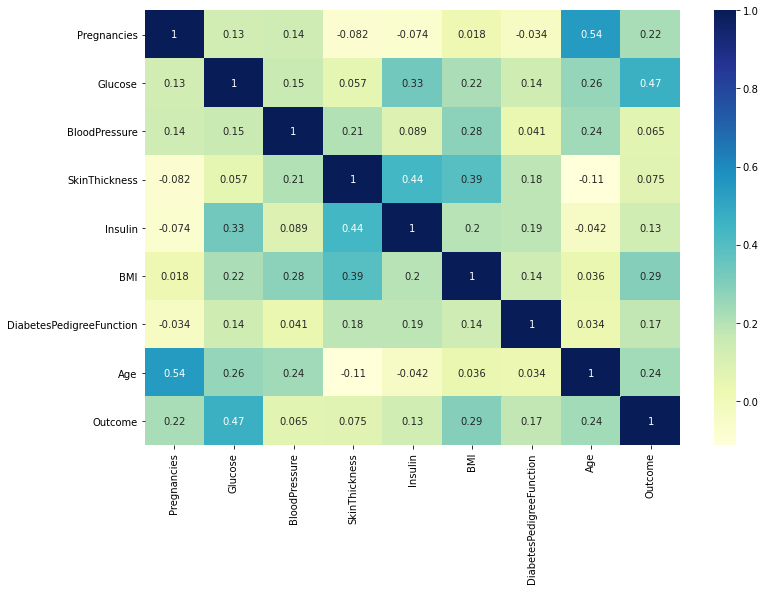

In [3]:
# It´s my habit to always plot the heatmap. I enjoy seeing if some variables are highly correlated to each other
plt.figure(figsize=(12,8))
sns.heatmap(dados.corr(), cmap='YlGnBu', annot=True)

Proporção de diabéticos:  34.89583333333333 %


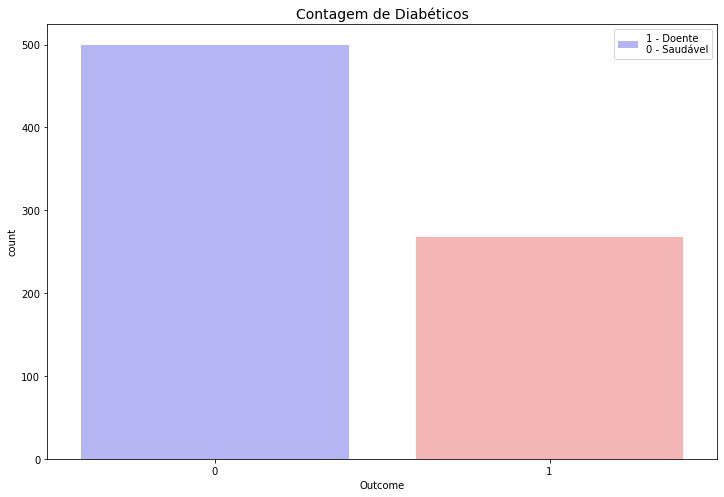

In [4]:
# To better understand our database, we can get a countplot of the number of healthy(0) individuals and the number of ill(1)
# Look that in the dataset there are more healthy individuals than ill ones...
# Because of dataset distribution of outcomes, we expect the models to predict better negatives than positives
print ('Proporção de diabéticos: ',dados['Outcome'].sum()/dados.shape[0]*100, '%')
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=dados, x='Outcome', palette='bwr')
ax.set_title('Contagem de Diabéticos', fontsize=14)
ax.legend(['1 - Doente\n0 - Saudável'])
plt.show()

In [5]:
# As soon as we have inputs with different range values, we must never forget to normalize them
from sklearn.preprocessing import StandardScaler
X = dados.drop('Outcome', axis = 1)

scaler = StandardScaler()
X_padronizado = scaler.fit_transform(X)

# Here is our normalized dataframe, Outcome is the target variable, so it was kept out of normalization process
X_padronizado = pd.DataFrame(X_padronizado, columns = X.columns)
X_padronizado

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [6]:
# Let´s get the Principal Components for each variable in de dataset
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_padronizado)
X_pca = pca.transform(X_padronizado)

# Here, we can get variation parameter for principal components in our analysis
variacao = np.round(pca.explained_variance_ratio_, decimals=3)
variacao

array([0.262, 0.216, 0.129, 0.109, 0.095, 0.085, 0.052, 0.051])

In [7]:
# plotting principal components in a dataframe
X_pca = pd.DataFrame(X_pca, columns = ['PC' + str(i) for i in range(1, len(variacao) + 1)])
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.068503,1.234895,0.095930,0.496990,-0.109985,0.357183,0.858821,0.974304
1,-1.121683,-0.733852,-0.712938,0.285056,-0.389507,-0.406329,0.757034,0.354215
2,-0.396477,1.595876,1.760678,-0.070395,0.906474,-0.040018,-1.152990,1.068528
3,-1.115781,-1.271241,-0.663729,-0.579123,-0.356060,-0.412520,-0.029247,-0.130648
4,2.359334,-2.184819,2.963107,4.033099,0.592684,1.078341,0.549358,-0.319352
...,...,...,...,...,...,...,...,...
763,1.562085,1.923150,-0.867408,-0.390926,-2.541527,-0.077322,1.141357,-0.138590
764,-0.100405,-0.614181,-0.764353,-0.134859,0.499290,0.529339,0.152109,0.467532
765,-0.283475,0.097065,-0.077192,-0.687561,-0.523009,-0.538270,-0.335563,0.289439
766,-1.060324,0.837062,0.425030,-0.204493,0.957593,0.153307,1.180308,-0.534344


In [8]:
# Splitting the dataset into train and test groups, using PCA dataframe as X (inputs)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, dados['Outcome'], test_size=.2,
                                                   random_state=101)

In [9]:
# The first classification method that I apply here is Support Vector Classifier
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

pred = svc.predict(X_test)

In [10]:
# From metrics, let´s evaluate the SVC on this dataset
print (metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       103
           1       0.74      0.61      0.67        51

    accuracy                           0.80       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.80      0.79       154



In [11]:
# The accuracy of prediction
print ('Acurácia:',round(metrics.accuracy_score(y_test, pred)*100,2),'%')

Acurácia: 79.87 %


In [12]:
# And finally, the confusion matrix is of extreme importance, in a way that allow us to see predicted and real outcomes
pd.DataFrame(metrics.confusion_matrix(y_test, pred), index=['Neg', 'Pos'], columns=['Pred Neg', 'Pred Pos'])

,Pred Neg,Pred Pos
Neg,92,11
Pos,20,31


In [13]:
# We can use GridSearch Cross Validation to check what´s the best parameters for SVC model in this special case
from sklearn.model_selection import GridSearchCV

# Dict of parameters that I set
parametros_grid = {'C':[0.01, 0.1, 1, 10, 100, 1000], 'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf']}

grid = GridSearchCV(SVC(), parametros_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.642, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.642, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................
[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.01, gamma=10, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.01, gamma=10, kernel=rbf, score=0.648, total=   0.1s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.642, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.642, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.650, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.642, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    6.3s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [14]:
# Let´s get the best fit of GridSearch
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [15]:
# applying the grid result
y_pred = grid.predict(X_test)

In [16]:
# Analogous, checking the result metrics
print (metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       103
           1       0.73      0.59      0.65        51

    accuracy                           0.79       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



In [17]:
# It´s worth noting that a little reduction of accuracy were observed after GridSearchCV
print ('Acurácia:',round(metrics.accuracy_score(y_test, y_pred)*100,2),'%')

Acurácia: 79.22 %


In [18]:
# One more individual were mistakenly classified
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), index=['Neg', 'Pos'], columns=['Pred Neg', 'Pred Pos'])

,Pred Neg,Pred Pos
Neg,92,11
Pos,21,30


In [19]:
# Now it´s time to apply Logistic Regression, since this is much more interpretable method than SVC
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

logmodel.fit(X_train, y_train)

y_pred2 = logmodel.predict(X_test)

In [20]:
# Look that the Logistic Regression´s recall (sensibility) is a little bit greater than SVC´s
print (metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       103
           1       0.72      0.65      0.68        51

    accuracy                           0.80       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.80      0.80       154



In [21]:
# We got the same accuracy with a much more interpretable algorithm
print ('Acurácia:',round(metrics.accuracy_score(y_test, y_pred2)*100,2),'%')

Acurácia: 79.87 %


In [22]:
# Applying Random Forest Classifier...
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred3 = rfc.predict(X_test)

In [23]:
# Performed worse than Logistic Regression and SVC
print (metrics.classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       103
           1       0.71      0.67      0.69        51

    accuracy                           0.80       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.80      0.80      0.80       154



In [24]:
# Also showed worse accuracy
print ('Acurácia:',round(metrics.accuracy_score(y_test, y_pred3)*100,2),'%')

Acurácia: 79.87 %


In [25]:
# Naive Bayes Classifier...
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred4 = nb.predict(X_test)

In [26]:
# Showed a better negative prediction recall, which means greater specificity, but with the cost of a poor sensibility
print (metrics.classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       103
           1       0.78      0.61      0.68        51

    accuracy                           0.81       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154



In [27]:
# The accuracy were better, but we need to think about the classification target. We could sacrifice sensibility here?
print ('Acurácia:',round(metrics.accuracy_score(y_test, y_pred4)*100,2),'%')

Acurácia: 81.17 %


In [28]:
# Now, let´s get the prob odds for each model
r_probs = [0 for _ in range(len(y_test))]
nb_probs = nb.predict_proba(X_test)
rfc_probs = rfc.predict_proba(X_test)
logmodel_probs = logmodel.predict_proba(X_test)
svc_probs = svc.decision_function(X_test)

In [29]:
nb_probs = nb_probs[:,1]
rfc_probs = rfc_probs[:,1]
logmodel_probs = logmodel_probs[:,1]

In [30]:
# After obtaining the metrics for models above, we can get their area under the ROC curve
# If you don´t know what´s the ROC curve, stay ahead, I´ll explain below
r_auc = metrics.roc_auc_score(y_test, r_probs)
rfc_auc = metrics.roc_auc_score(y_test, rfc_probs)
nb_auc = metrics.roc_auc_score(y_test, nb_probs)
logmodel_auc = metrics.roc_auc_score(y_test, logmodel_probs)
svc_auc = metrics.roc_auc_score(y_test, svc_probs)

In [31]:
# And print them to visualize
print ('Predição aleatória: AUROC = %.3f' % r_auc)
print ('Predição Random Forest: AUROC = %.3f' % rfc_auc)
print ('Predição Naive Bayes: AUROC = %.3f' % nb_auc)
print ('Predição Regressao Logistica: AUROC = %.3f' % logmodel_auc)
print ('Predição Support Vector Classifier: AUROC = %.3f' % svc_auc)

Predição aleatória: AUROC = 0.500
Predição Random Forest: AUROC = 0.845
Predição Naive Bayes: AUROC = 0.839
Predição Regressao Logistica: AUROC = 0.849
Predição Support Vector Classifier: AUROC = 0.868


In [32]:
# Below we get the tuples of false positive rates (x) and true positive rates (y) for each model
r_fpr, r_tpr, _ = metrics.roc_curve(y_test, r_probs)
rfc_fpr, rfc_tpr, _ = metrics.roc_curve(y_test, rfc_probs)
nb_fpr, nb_tpr, _ = metrics.roc_curve(y_test, nb_probs)
logmodel_fpr, logmodel_tpr, _ = metrics.roc_curve(y_test, logmodel_probs)
svc_fpr, svc_tpr, _ = metrics.roc_curve(y_test, svc_probs)

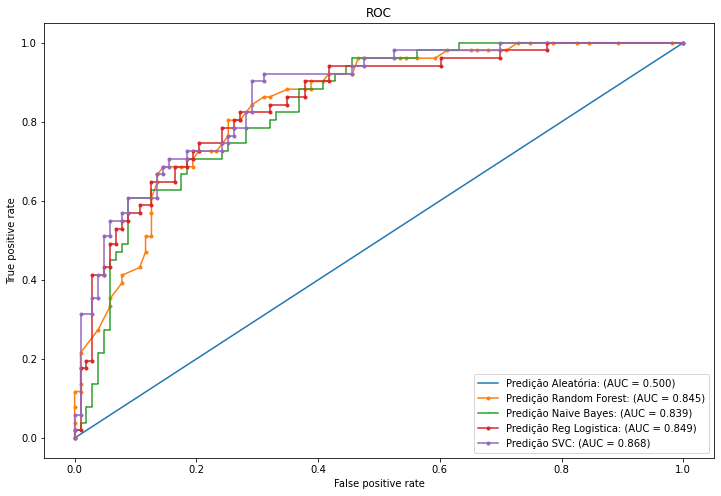

In [33]:
# In Medical problems, we must always analyse the Receiver Operating Characteristics (ROC) curve
# It represents the tradeoff between true positive rates (sensibility) and false positive rate
plt.figure(figsize=(12,8))
plt.plot(r_fpr, r_tpr, linestyle='-', label='Predição Aleatória: (AUC = %.3f)' % r_auc)
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Predição Random Forest: (AUC = %.3f)' % rfc_auc)
plt.plot(nb_fpr, nb_tpr, marker=',', label='Predição Naive Bayes: (AUC = %.3f)' % nb_auc)
plt.plot(logmodel_fpr, logmodel_tpr, marker='.', label='Predição Reg Logistica: (AUC = %.3f)' % logmodel_auc)
plt.plot(svc_fpr, svc_tpr, marker='.', label='Predição SVC: (AUC = %.3f)' % svc_auc)
plt.title('ROC')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

As we see above from the ROC plots, the SVC model performed better, with the greater AUC compared to Random prediction, Random Forest Classifier, Naive-Bayes Classifier and Logistic Regression. This indicates that a SVC model with standard calibration performed better than the calibrated one (with GridSearchCV) in this dataset. 

However, other methods such as Naive-Bayes Classifier could be the best if one intend to make a trial test, as we know that trials are better when specificity improves. If the target disease were highly healthy critical, we could prefer the method that gives the better recall for ill patients (in other words, have a better specificity).

The specificity of all methods could be improved if we increase the dataset or even raise the positive Diabetes individuals. However, a good specificity were acquired, thus, Naive-Bayes Classifier could be adequately choose to be used as a trial methods to discard individuals that are not at risk of develop diabetes